

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-479 Reconocimiento de patrones en minería de datos </h1>

<H2 align='center'> Tarea 1 - Clustering </H2>
<H3 align='center'> Lucio Fondón Rebolledo - 201773610-0</H3>
<H3 align='center'> Francisco Reyes Jainaga - 201773529-5</H3>
<hr style="height:2px;border:none"/>

# Instrucciones

1. La tarea debe ser desarrollada en parejas.  
2. Los medios de consultas serán Aula y el canal de Discord oficial del curso. 
3. La tarea debe ser realizada en Jupyter Notebook (Python3) utilizando este archivo como base.
4. Las librerías permitidas son las que se encuentran importadas en el Notebook. 
5. Se evaluará la correcta implementación de los Algoritmos de Clustering como también la comprensión de sus fundamentos teóricos y aplicaciones.
6. El archivo de entrega debe denominarse T1_Rol1_Rol2.ipynb. De no respetarse este formato existirá un descuento de 30 puntos. 
7. La fecha de entrega es el viernes 28 de mayo a las 23:55 hrs, posterior a esto se descontará 1 punto por cada minuto de atraso.  

# Parte 1 (55 pts)

En esta primera parte de la tarea se estudiarán los algoritmos de Clustering K-means, Clustering jerárquico aglomerativo y DBSCAN, aplicados a 3 datasets de tipo vectorial. El objetivo es contrastar estos 3 algoritmos y determinar ventajas y desventajas frente a cada caso de estudio. Además, analizar el impacto de la elección de parámetros y medidas de proximidad. 

Para las implementaciones solicitadas, no necesitan generar el código de cada algoritmo a mano, por lo que pueden hacer uso de librerías que tengan estos algoritmos ya implementados. 

## 1.1 Dataset

Para esta primera parte se cuenta con 3 archivos:

1. <b>Spiral.txt</b> : $N=312, D=2$
2. <b>R15.txt</b> : $N=600, D=2$
3. <b>cute-t2-4k.txt</b> : $ N=4200, D=2$

Cada uno correspondiente a un dataset vectorial bidimensional, donde cada fila del archivo tiene el formato: $x_1$\t$x_2$. Siendo $x_1$ y $x_2$ los atributos de cada dato $X^{(i)}$ $\in \mathbf{R} ^{2}$ . 
Los datasets tienen una cantidad de puntos de 312, 600 y 4200 respectivamente.

In [1]:
#Librerías 
import sklearn.cluster as skl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pylab as pl
import pandas as pd
import scipy
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
#data_array: Función que devuelve un np.array de tamaño [n, D]
#Parámetros: file -> nombre del archivo 

#data_plot: Función que genera una gráfica del dataset 
#especificado en el parámetro file

spiral_df = pd.read_csv("Spiral.txt", delimiter = "\t", header = None)
r15_df = pd.read_csv("R15.txt", delimiter = "\t", header = None)
cure_df = pd.read_csv("cure-t2-4k.txt", delimiter = "\t", header = None)

colors = ['salmon','khaki','silver','lightgreen','steelblue',
          'pink','lightblue','orchid','sienna','grey','lightcoral',
          'chocolate', 'maroon', 'tan', 'olivedrab','olive', 
          'dodgerblue', 'crimson', 'navy', 'fuchsia', 'aqua']

def data_array(file):
    data = np.loadtxt(file)
    return data

def data_plot(file):
    data = data_array(file)
    plt.title("Dataset") 
    plt.xlabel("x_1") 
    plt.ylabel("x_2") 
    plt.plot(data[:,0], data[:,1],"ob", color="c") 
    plt.show() 

#Ejemplo de uso de la función interact 
interact(data_plot, file=["Spiral.txt","R15.txt","cure-t2-4k.txt"])

interactive(children=(Dropdown(description='file', options=('Spiral.txt', 'R15.txt', 'cure-t2-4k.txt'), value=…

<function __main__.data_plot(file)>

## 1.2 K-Means (15 puntos)

In [3]:
cant_cluster = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

def func_kmeans(archivo, n_clusters):
    X = data_array(archivo)
    k_means = skl.KMeans(n_clusters).fit(X)

    centroids = k_means.cluster_centers_
    print("Centroides de " + archivo + "\n", centroids)
    
    score = metrics.silhouette_score(X, k_means.labels_, metric='euclidean')
    print('Silhouette Score: %.3f' % score)

    for k,color in zip(range(n_clusters),colors):
        my_members = k_means.labels_ == k
        cluster_center = centroids[k]
        plt.scatter(X[my_members, 0], X[my_members, 1],color = color)
        plt.scatter(cluster_center[0], cluster_center[1])
    plt.title('KMeans - '+archivo)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
def elbow_kmeans(archivo):
    Rango = range(1, 10)
    kmeans = [skl.KMeans(n_clusters=i) for i in Rango]

    #Método del codo para hayar k adecuado
    X = data_array(archivo)
    puntaje = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
    plt.figure(figsize=(8,6))
    plt.plot(Rango,puntaje, '.-')
    plt.xlabel('N de clusters')
    plt.ylabel('Puntaje')
    plt.title('Elbow Method ' +  archivo)
    plt.show()
              
def silhouette_kmeans(archivo):
    X = data_array(archivo)
    rango_silhouette = range(2,40)

    k_means = [skl.KMeans(n_clusters=i).fit(X) for i in rango_silhouette]

    silhouette = [] 

    for k_mean in k_means:
        score = metrics.silhouette_score(X, k_mean.labels_, metric='euclidean')
        silhouette.append(score)

    plt.figure(figsize=(8,6))
    plt.plot(rango_silhouette,silhouette, '.-')
    plt.xlabel('N de clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.title('Silhouette '+ archivo)

    print("El cluster que maximiza Silhouette es " + str(silhouette.index(max(silhouette))+2))

    plt.show()

### K-Means Spiral

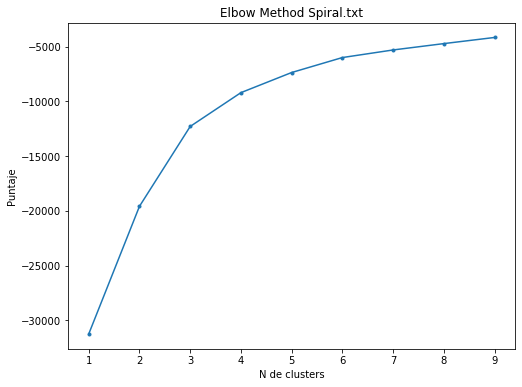

El cluster que maximiza Silhouette es 35


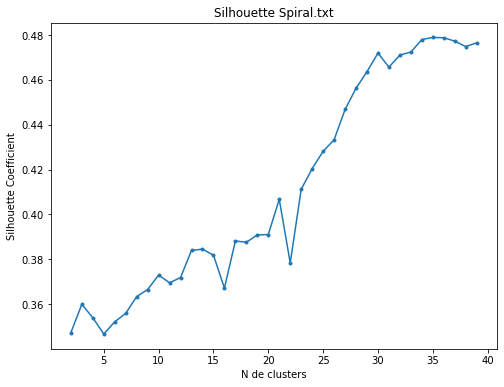

In [4]:
elbow_kmeans('Spiral.txt')
silhouette_kmeans('Spiral.txt')

In [5]:
# Para dataset "Spiral.txt"
interact(func_kmeans,archivo=["Spiral.txt"], n_clusters = cant_cluster)

interactive(children=(Dropdown(description='archivo', options=('Spiral.txt',), value='Spiral.txt'), Dropdown(d…

<function __main__.func_kmeans(archivo, n_clusters)>

### K-Means R15

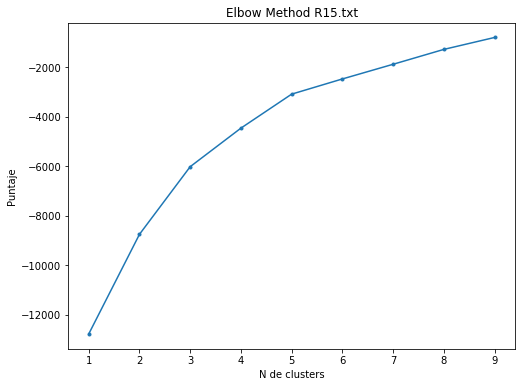

El cluster que maximiza Silhouette es 15


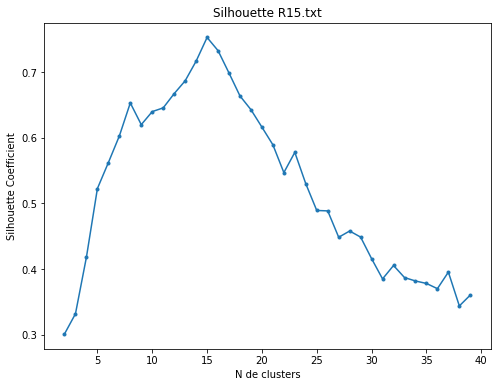

In [6]:
elbow_kmeans('R15.txt')
silhouette_kmeans('R15.txt')

In [7]:
# Para dataset "R15.txt"
interact(func_kmeans,archivo=["R15.txt"], n_clusters = cant_cluster)

interactive(children=(Dropdown(description='archivo', options=('R15.txt',), value='R15.txt'), Dropdown(descrip…

<function __main__.func_kmeans(archivo, n_clusters)>

### K-Means Cure

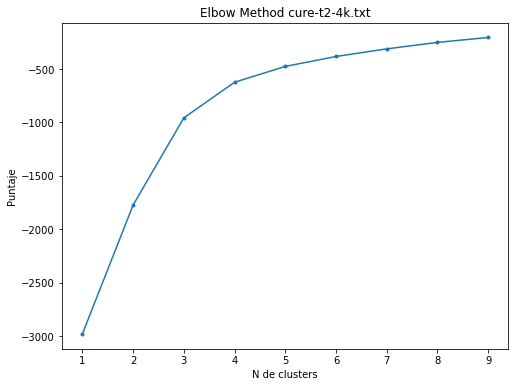

El cluster que maximiza Silhouette es 10


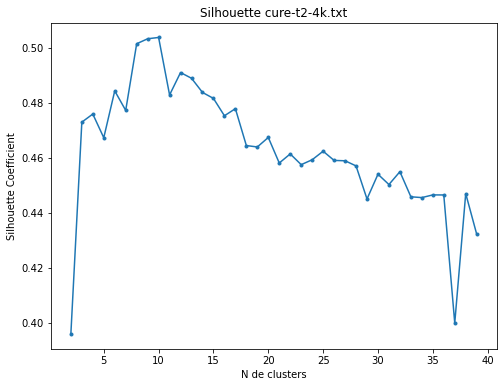

In [8]:
elbow_kmeans('cure-t2-4k.txt')
silhouette_kmeans('cure-t2-4k.txt')

In [9]:
# Para dataset "cure-t2-4k.txt"
interact(func_kmeans,archivo="cure-t2-4k.txt", n_clusters = cant_cluster)


interactive(children=(Text(value='cure-t2-4k.txt', description='archivo'), Dropdown(description='n_clusters', …

<function __main__.func_kmeans(archivo, n_clusters)>

a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?

En base a las distribuciones de los datasets anteriormente entregados, se puede concluir que K-means es más efectivo en el segundo dataset ("R15.txt"), esto principalmente debido a la forma en la cúal se distribuye el dataset y la forma en la que funciona el algoritmo k-means. En el dataset del espiral, k-means no entrega buenos resultados por la geometría de la distribución (quedan mal distribuidos los centroides), en donde no logra separar correctamente en grupos. En el tercer dataset tampoco muestra buenos desempeños debido a que existen mucho datos lejanos a los centroides (datos atípicos). También mencionar que k-means intenta particionar el cluster mayor en varios clusters, lo cual no es correcto, ya que se puede observar claramente que es sólo un clúster y no varios.

b. ¿Qué valor de k (cantidad de centroides) entrega un mejor resultado para cada uno de los datasets? ¿Qué método se podría utilizar para determinar un valor óptimo para k? 

* __Spiral.txt:__ $k = 3$
* __R15.txt:__ $k = 15$
* __cure-t2-4k.txt:__ $k = 10$

Para poder hallar valores más óptimos para $k$, se utilizaron el _Elbow Method_ y _Silhouette Method_ para cada uno de los datasets. Estos métodos nos ayudan a aproximar un buen número estimado de clusters, sin embargo, en este caso, k-means será efectivo solo en el dataset de R15.txt, por lo que probablemente no se pueda hallar un k adecuado utilizando este algoritmo.

## 1.3 DBSCAN (15 puntos)

In [10]:
#Implementación
from sklearn.cluster import DBSCAN
from sklearn import metrics
import ipywidgets as widgets
# los parametros variables son eps(radio) y min_samples(cant minima de puntos dentro)

def func_DBSCAN(archivo,eps, minimum_samples):
    X = data_array(archivo)
    db = DBSCAN(eps, minimum_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Número de clusters: " + str(n_clusters_))
    print("Número de noise points: " + str(n_noise_))

    #conjunto de labels
    unique_labels = set(labels)

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # ruido
            col = "black"

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], '.', color = col, markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', color = col, markersize=6)

    plt.title('Cantidad de clusters apróx: %d' % n_clusters_)
    plt.show()

In [11]:
def k_distances2(x, k):
    dim0 = x.shape[0] #cantidad de datos
    dim1 = x.shape[1] #cantidad de columnas

    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p) #distancia
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm


### DBSCAN Spiral

c:\users\lucio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


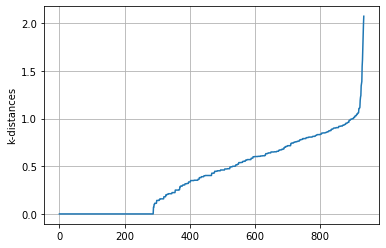

In [12]:
X_spiral = data_array('Spiral.txt')
m, m2= k_distances2(X_spiral, 3)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [13]:
interact(func_DBSCAN,archivo = ['Spiral.txt'], eps = widgets.FloatSlider(min=0.1, max=3.7, step=0.1, value=1.2), minimum_samples = widgets.IntSlider(min=1, max=11, step=1, value=3))


interactive(children=(Dropdown(description='archivo', options=('Spiral.txt',), value='Spiral.txt'), FloatSlide…

<function __main__.func_DBSCAN(archivo, eps, minimum_samples)>

### DBSCAN R15

c:\users\lucio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


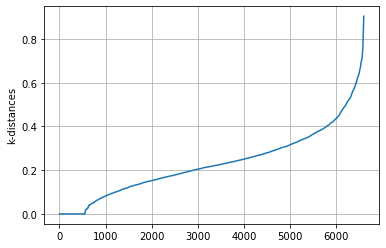

In [14]:
X_R15 = data_array('R15.txt')
m, m2= k_distances2(X_R15, 11)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [15]:
interact(func_DBSCAN,archivo = 'R15.txt', eps = widgets.FloatSlider(min=0.1, max=3.7, step=0.1, value=0.4), minimum_samples = widgets.IntSlider(min=1, max=11, step=1, value=8))

interactive(children=(Text(value='R15.txt', description='archivo'), FloatSlider(value=0.4, description='eps', …

<function __main__.func_DBSCAN(archivo, eps, minimum_samples)>

### DBSCAN Cure

c:\users\lucio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


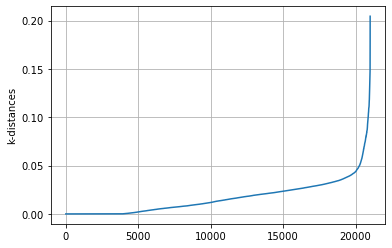

In [16]:
X_cure = data_array('cure-t2-4k.txt')
m, m2= k_distances2(X_cure, 5)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [17]:
interact(func_DBSCAN,archivo = 'cure-t2-4k.txt', eps = widgets.FloatSlider(min=0.01, max=0.17, step=0.01, value=0.05), minimum_samples = widgets.IntSlider(min=1, max=11, step=1, value=5))


interactive(children=(Text(value='cure-t2-4k.txt', description='archivo'), FloatSlider(value=0.05, description…

<function __main__.func_DBSCAN(archivo, eps, minimum_samples)>

a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?

En este caso, DBSCAN es más efectivo en el dataset cure-t2-4k.txt, esto debido principalmente a que logra separar correctaente 4 clusters distintos de manera relativamente bien, ya que logra juntar correctamente el grupo grande (naranja), el grupo de arriba (verde), y los dos grupos pequeños (amarillo y plomo), los cuáles, a pesar de se pequeños en área, son bastante densos debido a que aglutinan harta cantidad de puntos juntos. Cabe destacar que, aunque en el gráfico se aprecien varios noise points, éstos no están del todo mal, ya que se puede ver que éstos puntos están bastante separados y que no es claro que pertenezcan a algún cluster, por lo que tiene sentido que haya marcado los noise points.

b. ¿Qué parámetros de Eps y minPts entregan el mejor resultado para cada gráfico? ¿Qué estrategia podríamos utilizar para escoger estos parámetros?

* __Spiral.txt:__ eps = 1.20, minPts = 3
* __R15.txt:__ eps = 0.40, minPts = 8
* __cure-t2-4k.txt:__ eps = 0.05, minPts = 5

En este caso, para poder optimizar los valores de Eps y minPts, se utilizó el gráfico de k-dist plot, el cuál nos muestra la cantidad más apropiada (aproximadamente) de eps que se tiene que utilizar en base a los minPts. Este gráfico se puede interpretar de la forma en que funciona el Elbow Method, ya que también debemos estimar en donde se encuentra "el codo" del gráfico y así estimar una cantidad apropiada para el eps.

## 1.4 Hierarchical Agglomerative Clustering  (15 puntos)

In [18]:
#Implementación
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def func_dendogram(archivo, metodo_mezcla):
    X = data_array(archivo)

    linked = linkage(X, metodo_mezcla)

    labelList = range(1, len(X)+1)

    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               p = 8,
                truncate_mode='level',
                orientation='top',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True)
    plt.show()
    
def silhouette_HAC(archivo):

    X = data_array(archivo)
    rango_silhouette = range(2,40)

    HACs = [AgglomerativeClustering(n_clusters=i).fit(X) for i in rango_silhouette]

    silhouette = [] 

    for HAC in HACs:
        score = metrics.silhouette_score(X, HAC.labels_, metric='euclidean')
        silhouette.append(score)

    plt.figure(figsize=(8,6))
    plt.plot(rango_silhouette,silhouette, '.-')
    plt.xlabel('N de clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.title('Silhouette Method ' + archivo)

    print("El cluster que maximiza Silhouette es " + str(silhouette.index(max(silhouette))+2))

    plt.show()
    
def func_HAC(archivo,n_clusters, metodo_mezcla):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=metodo_mezcla)
    X = data_array(archivo)
    cluster.fit_predict(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
    plt.show()

### HAC Spiral

In [19]:
interact(func_dendogram, archivo = ["Spiral.txt"], metodo_mezcla = ['single','complete'])
interact(func_HAC, archivo = ["Spiral.txt"], n_clusters = widgets.IntSlider(min=2, max=20, step=1, value=5) ,metodo_mezcla = ['single','complete'])

interactive(children=(Dropdown(description='archivo', options=('Spiral.txt',), value='Spiral.txt'), Dropdown(d…

interactive(children=(Dropdown(description='archivo', options=('Spiral.txt',), value='Spiral.txt'), IntSlider(…

<function __main__.func_HAC(archivo, n_clusters, metodo_mezcla)>

### HAC R15

In [20]:
interact(func_dendogram, archivo = ["R15.txt"], metodo_mezcla = ['single','complete'])
interact(func_HAC, archivo = ["R15.txt"], n_clusters = widgets.IntSlider(min=2, max=20, step=1, value=5) ,metodo_mezcla = ['single','complete'])

interactive(children=(Dropdown(description='archivo', options=('R15.txt',), value='R15.txt'), Dropdown(descrip…

interactive(children=(Dropdown(description='archivo', options=('R15.txt',), value='R15.txt'), IntSlider(value=…

<function __main__.func_HAC(archivo, n_clusters, metodo_mezcla)>

### HAC Cure

In [21]:
interact(func_dendogram, archivo = ["cure-t2-4k.txt"], metodo_mezcla = ['single','complete'])
interact(func_HAC, archivo = ["cure-t2-4k.txt"], n_clusters = widgets.IntSlider(min=2, max=20, step=1, value=5) ,metodo_mezcla = ['single','complete'])

interactive(children=(Dropdown(description='archivo', options=('cure-t2-4k.txt',), value='cure-t2-4k.txt'), Dr…

interactive(children=(Dropdown(description='archivo', options=('cure-t2-4k.txt',), value='cure-t2-4k.txt'), In…

<function __main__.func_HAC(archivo, n_clusters, metodo_mezcla)>

a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 

El dataset en donde se obtiene un mejor resultado para este algoritmo es en el dataset del espiral con método de mezcla single. Esto principalmente debido a que lo obtenido en el dendograma (que habrán 3 clusters asociados al dataset) nos entregó la mejor opción posible de número de clusters asociados al dataset, logrando separar y distribuir correctamente los 3 clusters encontrados (básicamente cada hélice de la espiral).

b. ¿En cuál o cuáles datasets se obtiene un mejor resultado para HAC utilizando single-link? ¿Por qué?  

En este caso, en el primer y el segundo dataset se obtienen buenos resultados (más en el primero que en el segundo, el dendograma nos muestra que son 8 clusters, pero con 15 podría mejorarse) utilizando single-link como método de mezcla. Lo anterior se debe a la forma en que se distribuyen los datos de éstos dataset. En cada paso de single-link se agrupan 2 clusters (o elementos) que tienen distancia mínima y están en distintos clústers. Esto nos puede ser de mucha utilidad para los dos primeros dataset, debido a que los elementos en los datasets se encuentran más o menos bien separados y definidos, no así como en el tercer dataset, en donde se encuentra un gran volumen de datos y bastante mezclados, por lo que single-link no es una opción que se ajuste de buena manera en el tercer dataset.

## 1.5 Conclusiones  (10 puntos)

a. ¿Qué algoritmo entregó un mejor resultado para cada dataset? Compare las ventajas y desventajas de cada algoritmo utilizado en relación a las características de los clusters de cada dataset y concluya. Para esta comparación, básese en los resultados para los mejores valores de k, Eps y minPts obtenidos. 

* __Spiral.txt:__ En este caso, el algoritmo que mejor se adapta a este dataset sería el algoritmo del Clustering Jerárquico (HAC). K-means en este dataset no es bueno del todo, ya que no logra separar correctamente las 3 hélices que se pueden observar en la forma del gráfico, las cuáles claramente representan 3 clusters en este caso. DBSCAN nos agrupa correctamente los 3 clusters que se pueden observar en el dataset, sin embargo, el número de Silhouette no logra ser muy alto, además de que hubo que estimar en base a varios métodos los Eps y minPts que maximizaban nuestro resultado. En cambio, usando HAC con single-link en el dataset del Spiral.txt, el dendograma nos muestra claramente que se necesitarán 3 clusters en el dataset, y al no ser un gran volumen de datos, HAC funciona de buena manera y entrega el resultado esperado.


* __R15.txt:__ Para el dataset R15.txt, k-means es el algoritmo que entrega los mejores resultados. Al igual que en el anterior, DBSCAN agrupa 15 los 15 clusters que se esperan, y funciona especialmente bien al poder separar el grupo grande de en medio en los 8 clusters. Sin embargo, nos entrega tambié noise points que podrían perfectamente pertenecer a los clusters de en medio, por lo que no es la mejor opción. HAC entrega un resultado un poco peor que DBSCAN, ya que el dendograma nos muestra que habrán un total de 8 clusters (esto debido a que no particiona el grupo de en medio), lo cual no es la mejor opción, ya que vimos que la mejor opción de separar los clusters era en 15 grupos.


* __cure-t2-4k.txt:__ Para este dataset, el algoritmo que mejor trabaja los datos es DBSCAN, ya que el dataset al tener puntos no pertenecientes a clusters muy claros, el algoritmo los interpreta como noise points, por lo que la separación de clusters lo hace muy bien. En el caso de K-means, este separa puntos en clusters los cuales a simple vista se nota que pertenecen al mismo, como en el cluster circular grande en la parte inferior izquierda del plot. El algoritmo HAC, utilizando simple linkage la agrupación de clusters es mala, ya que al existir gran cantidad de nodos entre clusters, el algoritmo los utiliza y asi interpreta mas de un cluster como uno. Y en complete linkage funciona mucho mejor pudiendo separar los clusters claros pero agregando a estos nodos bastante dificiles de interpretar, por lo que algunos clusters en sus perimetros se extienden mucho y tienen una muy baja densidad de nodos.


b. ¿Qué algoritmo entregó el peor resultado para cada dataset? Justifique. 

* __Spiral.txt:__ En este dataset, como se mencionó anteriormente, k-means entrega los peores resultados al momento de tener que separar los clusters, ya que no logra distinguir correctamente entre cada hélice del espiral que tenemos en nuestro dataset, agrupando en clusters información que debería pertenecer a otro.


* __R15.txt:__ Para este dataset, el peor resultado nos lo entrega el algoritmo de HAC, esto principalmente debido a que, si bien logra separar bien los grupos pequeños de los extremos, agarra los 8 grupos pequeños como si fuera uno solo, agarrando en total así solo 8 clusters, el cuál también lo indica en su dendograma asociado.


* __cure-t2-4k.txt:__ En este dataset, el peor algoritmo utilizado es HAC, aunque K-means tampoco fue muy bueno, pero a medida que se piden más clusters con K-means, las divisiones de comunidades pueden trabajarse juntas para así representar a los clusters reales (que se ven a simple vista), pero HAC aunque se aumente la cantidad de clusters, su resolución con simple-link es muy mala, y utilizando complete linkage, sigue agrupando datos de clusters distintos en un mismo cluster, por lo que de ninguna manera se podrian trabajar esos datos.




# Parte 2 - Image Segmentation (20 pts)

La segmentación de imagen (Image Segmentation) es un problema de visión computacional que apunta al particionamiento de una imagen en diferentes áreas de pixeles que tienen atributos similares. Eso se realiza generando una máscara sobre la imagen que asigna una etiqueta a cada pixel y donde pixeles con la misma etiqueta forman parte de la misma región. 

La segmentación de imágenes se utiliza principalmente para detectar objetos o bordes en imágenes, y tiene diversas aplicaciones como lo son la identificación de células cancerígenas en exámenes médicos, identificación de cuerpos de interés en imágenes satelitales, entre otras. 


<img src="https://dl.acm.org/cms/attachment/8542befb-3134-46f0-a5ad-1534c63188b4/csur5204-73-f01.jpg" title="Title text" width="80%" />
<center> <i> Figura 1. Ejemplo de Image Segmentation. </i> </center>


## Preguntas

 
1. Realice Image Segmentation utilizando el algoritmo K-Means para la imagen1.jpg y la imagen2.jpg
2. Muestre gráficamente el resultado de la segmentación en ambas imágenes donde se distingan claramente los clusters obtenidos. Concluya.

> Para la pregunta 1, antes de realizar la segmentación se debe realizar un preprocesamiento de las imágenes que consiste en lo siguiente: 

> 1.En primer lugar, se debe vectorizar la imagen transformando la imagen inicial de dimensiones $p_{w}xp_{h}x3$ en  un array resultante de dimensiones $Kx3$, siendo $K= p_{h}p_{w}$ donde $p_w$ y $p_h$ son el número de pixeles de ancho y alto de la foto respectivamente. 

> 2.Antes de aplicar la segmentación con K-Means, se debe transformar los valores del arreglo resultante desde uint8 a float32 para poder aplicar el algoritmo K-Means implementado en la librería cv2.


## 1)

In [22]:
#Preprocesamiento de las imágenes
import cv2

im1 = cv2.imread('imagen1.jpg') #esta está en BGR, no es necesario cambiar
ph_1, pw_1, _ = im1.shape

im2 = cv2.imread('imagen2.jpg')
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB) #esta está en RGB, se cambia

ph_2, pw_2, _ = im2.shape

print("Imagen 1: pw_1 (pixeles de ancho) = %d ph_1 (pixeles de alto) = %d" % (pw_1, ph_1))
print("Imagen 2: pw_2 (pixeles de ancho) = %d ph_2 (pixeles de alto) = %d" % (pw_2, ph_2))

#imagenes vectorizadas listas para hacer image segmentation
im1_vectorized = np.reshape(im1, (pw_1 * ph_1, 3)).astype(np.float32) 
im2_vectorized = np.reshape(im2, (pw_2 * ph_2, 3)).astype(np.float32)

print("Dimensiones imagen1.jpg vectorizada: " + str(im1_vectorized.shape))
print("Dimensiones imagen2.jpg vectorizada: " + str(im2_vectorized.shape))


Imagen 1: pw_1 (pixeles de ancho) = 286 ph_1 (pixeles de alto) = 176
Imagen 2: pw_2 (pixeles de ancho) = 500 ph_2 (pixeles de alto) = 500
Dimensiones imagen1.jpg vectorizada: (50336, 3)
Dimensiones imagen2.jpg vectorizada: (250000, 3)


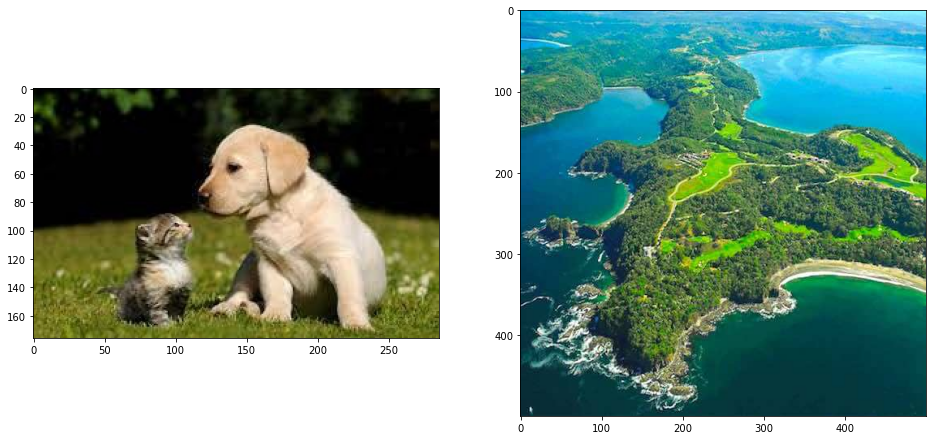

In [23]:
plt.figure(figsize=(16,12))

plt.subplot(1, 2, 1)
plt.imshow(im1)

plt.subplot(1, 2, 2)
plt.imshow(im2)

plt.show()

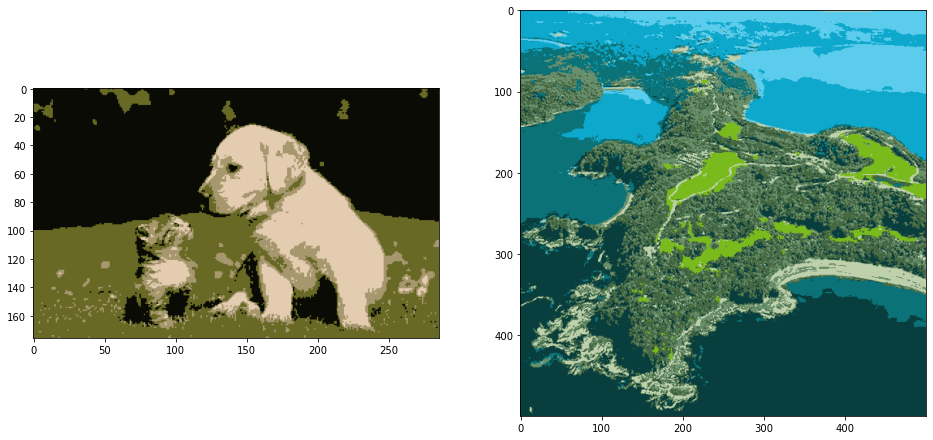

In [24]:
#---------------------Imagen perro y gato-------------------------------#
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4
_, labels, (centers) = cv2.kmeans(im1_vectorized, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()

segmented_image_1 = centers[labels.flatten()]
segmented_image_1 = segmented_image_1.reshape(im1.shape)

#---------------------Imagen isla---------------------------------------#
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 8
_, labels, (centers) = cv2.kmeans(im2_vectorized, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()
segmented_image_2 = centers[labels.flatten()]
segmented_image_2 = segmented_image_2.reshape(im2.shape)


#---------Ploteamos las imagénes ya segmentadas con k-means--------------#
plt.figure(figsize=(16,12))

plt.subplot(1, 2, 1)
plt.imshow(segmented_image_1)

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_2)

plt.show()

# 2)

Viendo las imágenes ya segmentadas, notemos que para la imagen1.jpg (Perro y gato), se pueden evidenciar los $k = 4$ clusters que se definieron en un principio para poder segmentar la imagen utilizando el algoritmo k-means. Podemos identificar bien los 4 clusters obtenidos debido a que el contraste de los colores en esta imagen es bastante alto, entonces es más facil poder identificar la imagen segmentada y poder diferenciar claramente elementos unos de otros. Por otro lado, para la imagen2.jpg (Isla) no es muy fácil identificar la cantidad de clusters que podrían estar presentes dentro de la imagen. En este caso, se entregó un $k = 8$ al algoritmo de k-means para que realice la segmentación de la imagen. Sin embargo, debido al poco contraste que tiene la imagen (especialmente en la parte de los cielos) con sus colores, por lo que habrán muchas tonalidades de colores distintas y no tan fáciles de identificar como en la imagen anterior, por lo que la segmentación de la imagen para imagen2.jpg no es tan clara ni directa como en imagen1.jpg, en la que sí es fácil diferenciar cada cluster en la imagen ya segmentada.

---
# Parte 3 - Community Detection (25 pts) 

En la última parte de la tarea, se estudiará el algoritmo Louvain para Detección de Comunidades aplicado al dataset de grafos "Enron email network". 

## Dataset

* Para esta parte de la tarea, trabajaremos con el dataset de grafos <b>"Enron email network"</b>, el cual contiene las interacciones vía correo electrónico de 36692 trabajadores y trabajadoras de la compañía energética estadounidense "Enron". 
* Este dataset se encuentra contenido en el archivo adjunto "Email-Enron.txt" en el cual se enumeran todos los pares de correos electrónicos de dicha empresa entre los cuales se ha enviado al menos un mensaje. 
* El archivo contiene 183831 líneas, las cuales corresponden al total de aristas no dirigidas del grafo y su formato por línea es:

<blockquote> #Nodo_origen \t #Nodo_destino. </blockquote>

## Community Detection

El problema de <b>Detección de Comunidades</b> es un problema fundamental en análisis de redes y consiste en buscar grupos de nodos que tengan ciertas propiedades en común y que, por tanto, sean más similares entre si que con otros nodos. A estos conjuntos de nodos les llamamos "comunidades". 

Si modelamos las interacciones de un conjunto de personas en un determinado contexto como un grafo, tendríamos que los nodos corresponderían a las personas y las aristas a las interacciones entre ellas. En este contexto, podemos definir a una comunidad como un subconjunto de nodos del grafo que están densamente conectados entre sí y débilmente conectados a los nodos en otras comunidades dentro del grafo. 

Para esto, podemos utilizar el algoritmo Louvain de Detección de comunidades para realizar Clustering en grafos, en el cual los clusters obtenidos corresponderán a las comunidades dentro del grafo. 


## Algoritmo Louvain 

Es un algoritmo para detección de comunidades en redes complejas o grafos, ideado en 2008 por investigadores de la Universidad Católica de Bélgica, cuyo objetivo es maximizar la modularidad de un grafo. 

¿Qué es la modularidad? Es una medida que compara la cantidad de aristas dentro y fuera de la comunidad, la cual está expresada por la siguiente ecuación para grafos con peso:  

\begin{equation*}
    Q = \dfrac{1}{2m} \sum_{i,j} [ A_{ij} - \dfrac{k_{i}k_{j}}{2m}] \delta (c_{i}, c_{j})
\end{equation*}

Donde:

* $A_{ij}$ es el peso de la arista entre $i$ y $j$
* $k_{i}$, $k_{j}$ son la suma de los pesos de las aristas conectadas a los nodos i y j respectivamente
* $m$ es la suma de todos los pesos de las aristas en el grafo
* $\delta$ es la función delta de Kronecker. La cual es 1 si $x = y$ y 0 en el caso contrario. 
* $Q \in [-1,1]$


Para optimizar la modularidad, el algoritmo realiza los siguientes pasos: 
1. Inicialmente, cada nodo constituye una comunidad. 
2. Luego, se selecciona un nodo al azar y se evalúa si la partición tiene mejor modularidad al asignar dicho nodo a la comunidad de alguno de sus vecinos. 
3. Si la modularidad de la partición actual es mejor, el nodo se queda en su comunidad. 
4. Si la modularidad de la partición al asignar el nodo a uno de sus vecinos es mejor, se asigna dicho nodo a la comunidad de dicho vecino. 
5. Se sigue seleccionando nodos al azar y realizando los pasos anteriores, hasta que las particiones obtenidas en dos pasos seguidos sean iguales. 


> Para esta implementación, se debe instalar la librería [Python-Louvain](https://github.com/taynaud/python-louvain) (<i>leer documentación y pasos de instalación</i>). Además, utilice la librería networkx para elaborar el grafo. 

In [25]:
#Librerías
import pandas as pd
import community as community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Preguntas

1. Cargar el dataset en un grafo de networkx.
2. Aplicar el algoritmo Louvain para Clustering en el grafo. 
3. Generar un nuevo archivo "out.txt" con los nodos etiquetados. 
4. Mostrar gráficamente 5 comunidades. No importa si estas comunidades están conectadas las unas a las otras.  

1)

In [26]:
email_df = pd.read_csv("Email-Enron.txt", delimiter = "\t", header = 3)
G= nx.from_pandas_edgelist(email_df, "# FromNodeId", "ToNodeId")
email_df

,# FromNodeId,ToNodeId
0,0,1
1,1,0
2,1,2
3,1,3
4,1,4
...,...,...
367657,36688,36686
367658,36688,36687
367659,36689,36690
367660,36690,36689


2)

In [27]:
partition = community_louvain.best_partition(G)

3)

In [28]:
f = open("out.txt", "w")

f.write("Nodo	Comunidad\n")

for nodo, comunidad in partition.items():
    f.write(str(nodo) + "\t" + str(comunidad) + "\n")

f.close()

4)

In [29]:
partitioned_df = pd.read_csv("out.txt", delimiter = "\t", header = 0)
partitioned_df

,Nodo,Comunidad
0,0,16
1,1,16
2,2,16
3,3,30
4,4,30
...,...,...
36687,36679,28
36688,36680,28
36689,36681,28
36690,36689,29


In [30]:
cant_comunidades = partitioned_df.groupby('Comunidad').count()
cant_comunidades = cant_comunidades[(cant_comunidades['Nodo'] > 15) & (cant_comunidades['Nodo'] < 200)]
comunidades = list(cant_comunidades.head().index)
filtro_partitioned_df = partitioned_df[partitioned_df['Comunidad'].isin(comunidades)]

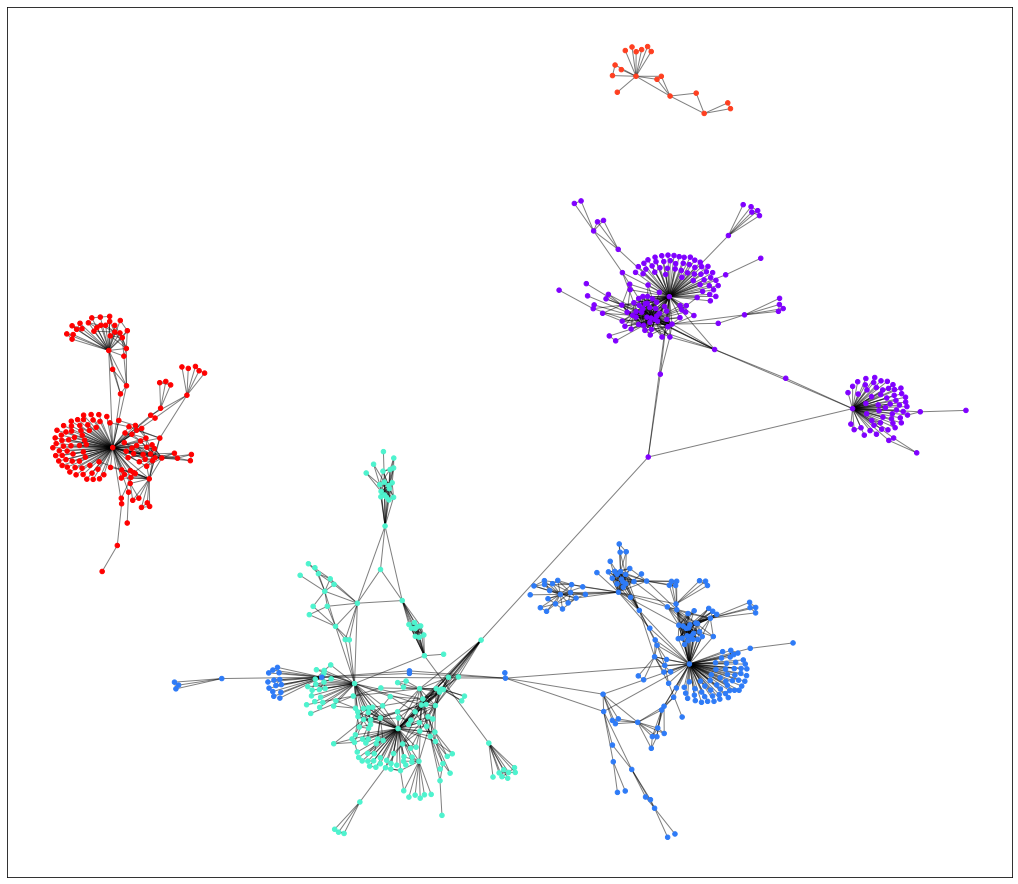

In [31]:
valores_nodos = filtro_partitioned_df['Nodo'].values
comunidades_nodos = filtro_partitioned_df['Comunidad'].values

boolean_series = email_df['# FromNodeId'].isin(valores_nodos) & email_df['ToNodeId'].isin(valores_nodos)

filtered_df = email_df[boolean_series]

G_filtrado = nx.from_pandas_edgelist(filtered_df, '# FromNodeId', 'ToNodeId')
pos = nx.spring_layout(G_filtrado)
cmap = cm.get_cmap('rainbow', max(comunidades) + 1)

plt.figure(figsize=(18,16))

nx.draw_networkx_nodes(G_filtrado, pos, valores_nodos, node_size=20,
                       cmap=cmap, node_color=comunidades_nodos, alpha=2.0)
nx.draw_networkx_edges(G_filtrado, pos, alpha=0.5)

plt.show()